In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(rc={"figure.figsize":(16, 8)}) #width=3, #height=4
import matplotlib.pyplot as plt
import os

In [2]:
#defining some constants to make life easier
#experiments
E0102 = 'incnoise0102'
E0104 = 'incnoise0104'
E0106 = 'incnoise0106'
ENSTP = 'incnoise0102-steps'
ENFIX = 'incnoise-fixed'
ESTD = 'masterstandard'

#tasksV0
THOP = 'xhopperv0'
TANT = 'xantv0'
THAL = 'xhalfcheetahv0'
tasks_v0 = [THOP,TANT,THAL]
#tasksV5
THOP5 = 'xhopper'
TANT5 = 'xant'
THAL5 = 'xhalfcheetah'
tasks_v5 = [THOP5,TANT5,THAL5]

## Loading data

In [3]:
exp_list = [E0102,E0104,E0106,ENSTP,ENFIX,ESTD]
task_list = [THOP,TANT,THAL,THOP5,TANT5,THAL5]

columns = ['Experiment','Task','Seed','Noise per steps','Trial','Reward','steps_taken']
data = pd.DataFrame(columns=columns)

for exp in exp_list:
    for task in task_list:
        for i in range(1,11):
            try:
                data_seed = pd.read_csv(os.path.join(exp,task,f'robustness_bestgS{i}.npy.csv'))
                data_seed.loc[:,'Experiment'] = exp
                data_seed.loc[:,'Task'] = task
                data_seed.loc[:,'Seed'] = i
                data_seed.loc[:,'Noise per steps'] = data_seed['noise_level'].astype('str')+' - '+data_seed['corr_n_steps'].astype('str')
                data = data.append(data_seed)
            except:
                print(f'Data from {os.path.join(exp,task,f"robustness_bestgS{i}.npy.csv")} couldn\'t be loaded. Skipping.')
data.drop('Unnamed: 0',axis=1,inplace=True)
data['Seed'] = data['Seed'].astype(int)
data['Trial'] = data['Trial'].astype(int)
data['steps_taken'] = data['steps_taken'].astype(int)
data['corr_n_steps'] = data['corr_n_steps'].astype(int)

noise_level_list = data['noise_level'].unique() 
noise_steps_list = data['corr_n_steps'].unique()
noise_per_steps = data['Noise per steps'].unique()
data.head(20)

## Creating a pivot_table and an aggregated (data_plot) version of the df
table_data = pd.pivot_table(data,values=['Reward','steps_taken'],index=['Experiment','Task','noise_level','corr_n_steps','Seed'],aggfunc=np.mean)
data_plot = pd.DataFrame()
for exp in exp_list:
    for task in task_list:
        for noise in noise_level_list:
            for steps in noise_steps_list:    
                data_tmp = table_data.loc[exp, task, noise,steps].copy()
                data_tmp['Experiment'] = exp
                data_tmp['Task'] = task
                data_tmp['noise_level'] = noise        
                data_tmp['noise_steps'] = steps
                data_tmp['Noise per steps'] = f"{noise} - {steps}"
                data_plot = data_plot.append(data_tmp)    

data.shape                

(360000, 9)

# Plotting data

## Robustness overview - v5

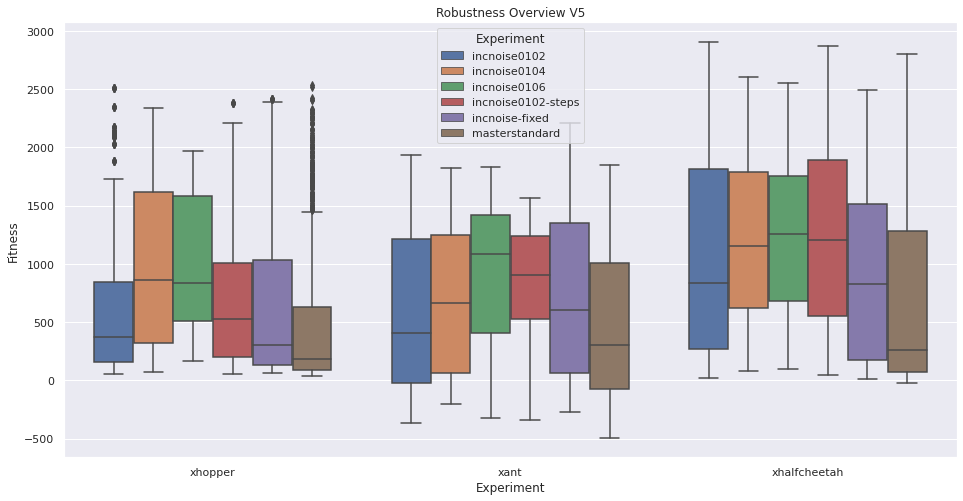

In [4]:
ax = sns.boxplot(
    data=data_plot.query(
        f' \
        Experiment.isin(@exp_list) and  \
        Task.isin(@tasks_v5)'
    ,engine="python"),
    x='Task',
    y='Reward',
    hue='Experiment')
_ = ax.set(xlabel='Experiment',
       ylabel='Fitness',
       title=f'Robustness Overview V5')

## Standard post-evaluation conditions (10 trials) - V5

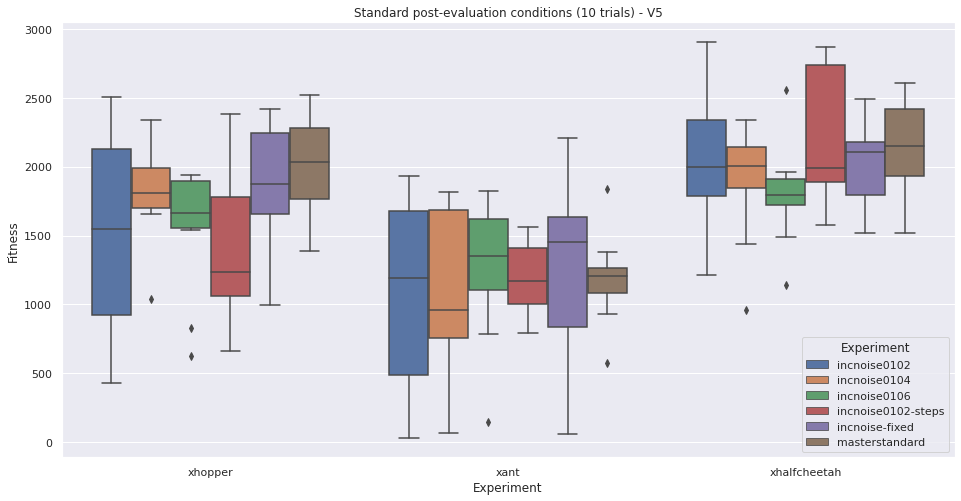

In [5]:
ax = sns.boxplot(
    data=data_plot.query(
        f' \
        Experiment.isin(@exp_list) and  \
        Task.isin(@tasks_v5) and \
        noise_level == 0.01 and \
        noise_steps == 1'
    ,engine="python"),
    x='Task',
    y='Reward',
    hue='Experiment')
_ = ax.set(xlabel='Experiment',
       ylabel='Fitness',
       title=f'Standard post-evaluation conditions (10 trials) - V5')

In [6]:
tmp = data_plot.query(
        f' \
        Experiment.isin(@exp_list) and  \
        Task.isin(@tasks_v5) and \
        noise_level == 0.01 and \
        noise_steps == 1'
    ,engine="python")
data.query('Experiment == "incnoise-nsteps" and Task=="xhopper" and corr_n_steps==1 and noise_level==0.01').iloc[50:100,:].head(50)[['Seed','Trial','Reward']]

,Seed,Trial,Reward


## Robustness overview - v0

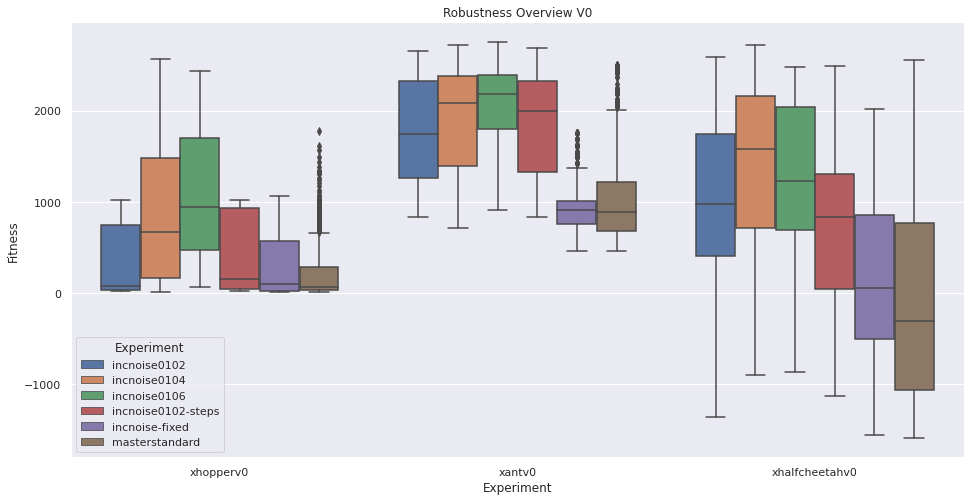

In [7]:
ax = sns.boxplot(
    data=data_plot.query(
        f' \
        Experiment.isin(@exp_list) and  \
        Task.isin(@tasks_v0)'
    ,engine="python"),
    x='Task',
    y='Reward',
    hue='Experiment')
_ = ax.set(xlabel='Experiment',
       ylabel='Fitness',
       title=f'Robustness Overview V0')

## Standard post-evaluation conditions (10 trials) - V0

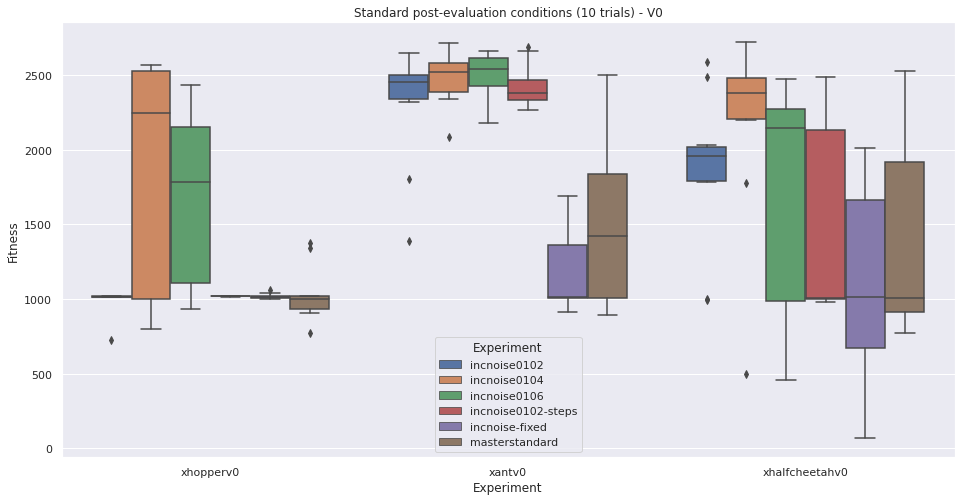

In [8]:
experiment_param = ",".join([f'\'{x}\'' for x in exp_list])
ax = sns.boxplot(
    data=data_plot.query(
        f' \
        Experiment.isin(@exp_list) and  \
        Task.isin(@tasks_v0) and \
        noise_level == 0.01 and \
        noise_steps == 1'
    ,engine="python"),
    x='Task',
    y='Reward',
    hue='Experiment')
_ = ax.set(xlabel='Experiment',
       ylabel='Fitness',
       title=f'Standard post-evaluation conditions (10 trials) - V0')

## Experiment vs Noise Level - Uncorrelated - V0

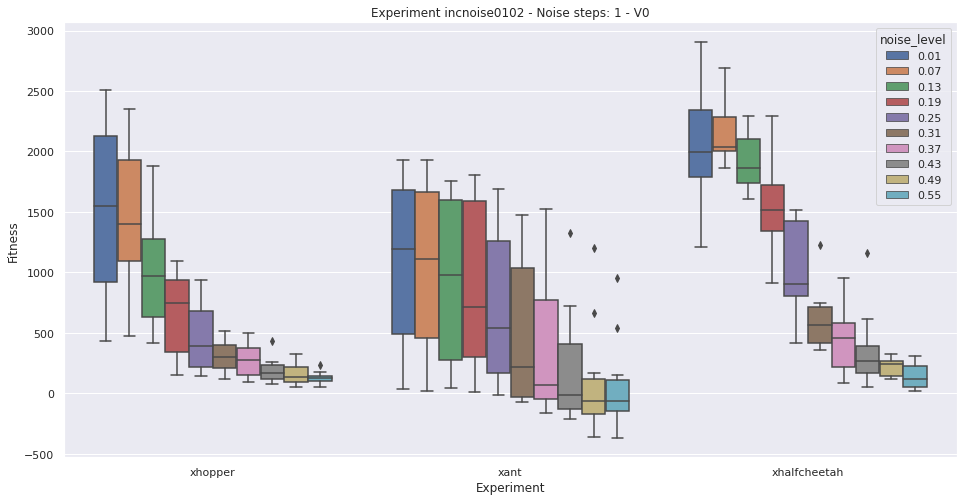

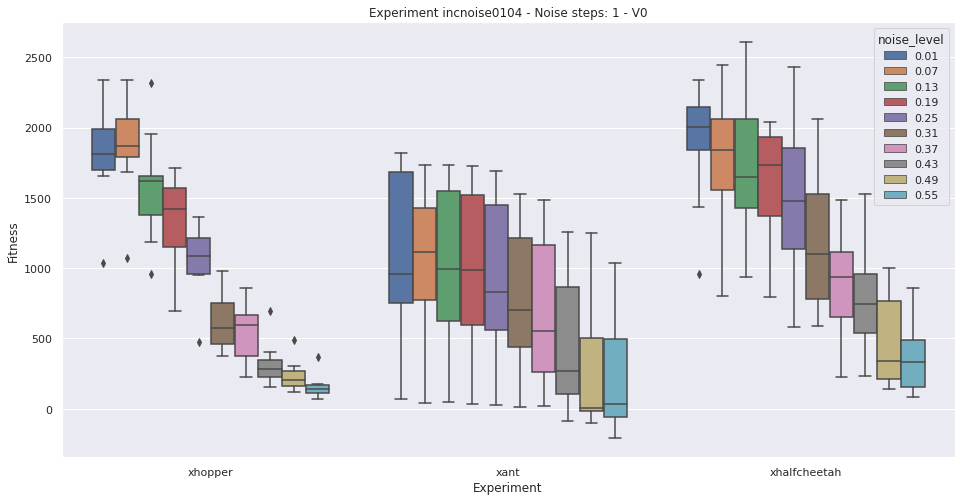

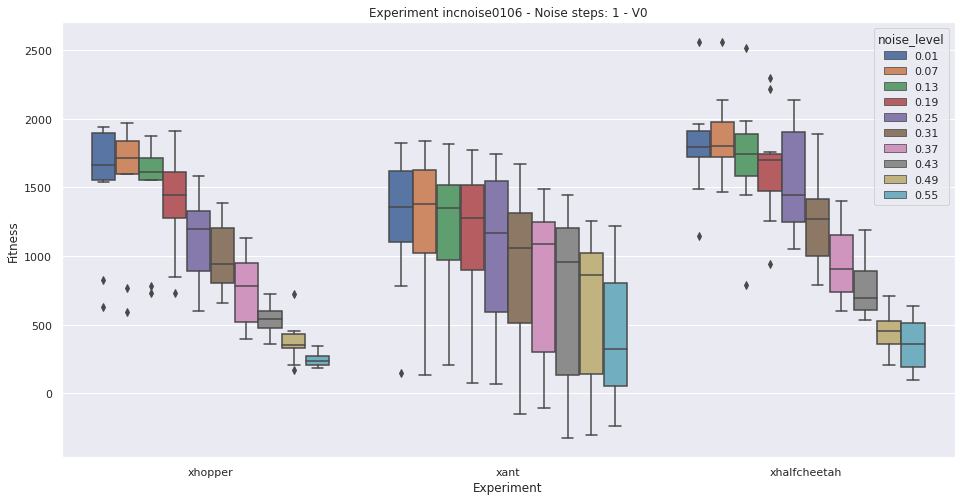

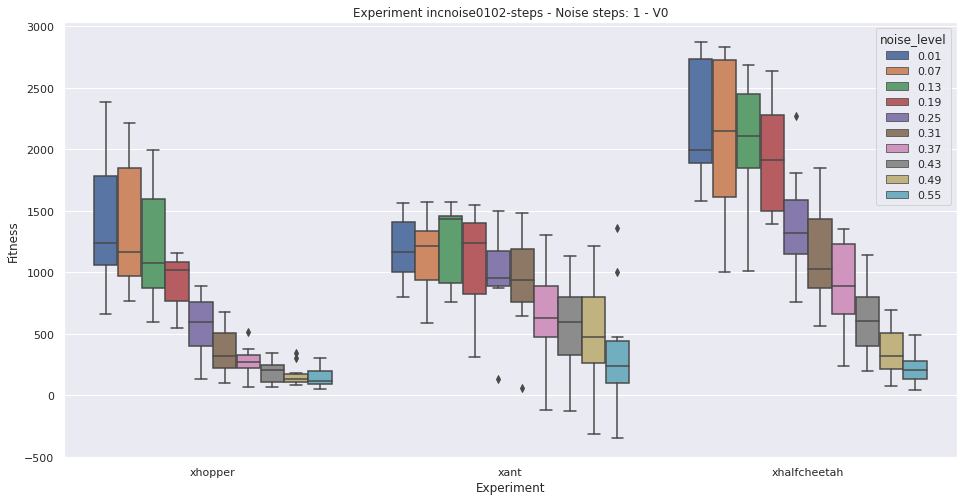

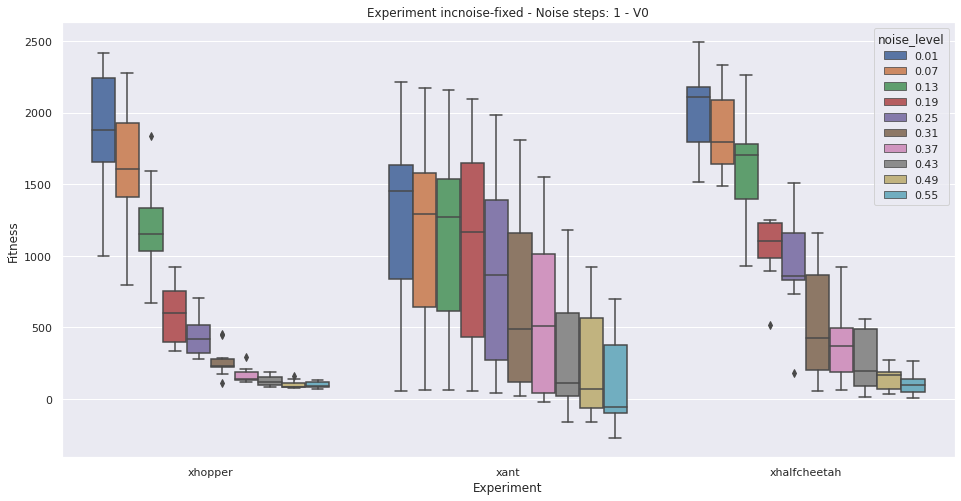

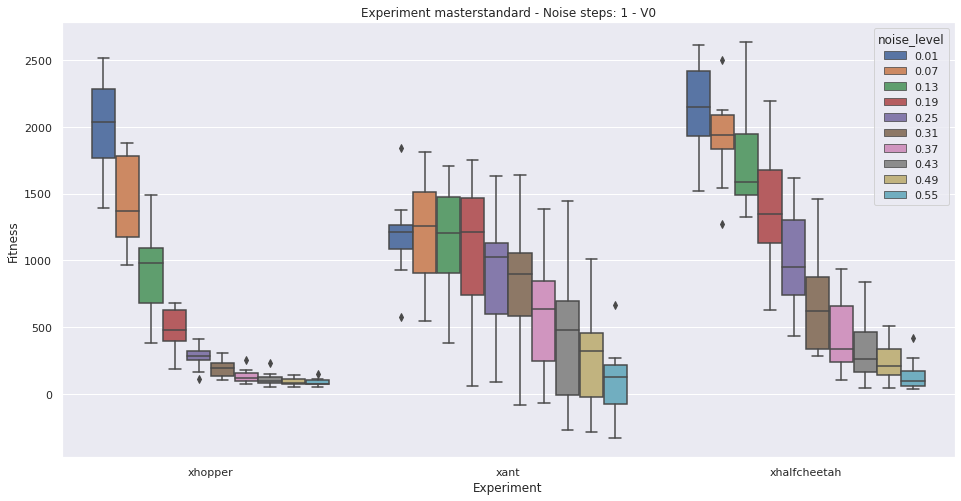

<Figure size 1152x576 with 0 Axes>

In [9]:
for exp in exp_list:
    steps = 1
    ax = sns.boxplot(
        data=data_plot.query(
            f' \
            Experiment == "{exp}" and  \
            Task.isin(@tasks_v5) and  \
            noise_steps == {steps} and  \
            noise_level in (0.01,0.07,0.13,0.19,0.25,0.31,0.37,0.43,0.49,0.55)'
        ,engine="python"),
        x='Task',
        y='Reward',
        hue='noise_level')
    _ = ax.set(xlabel='Experiment',
           ylabel='Fitness',
           title=f'Experiment {exp} - Noise steps: {steps} - V0')
    plt.figure()

## Experiment vs Noise Level - Uncorrelated - V5

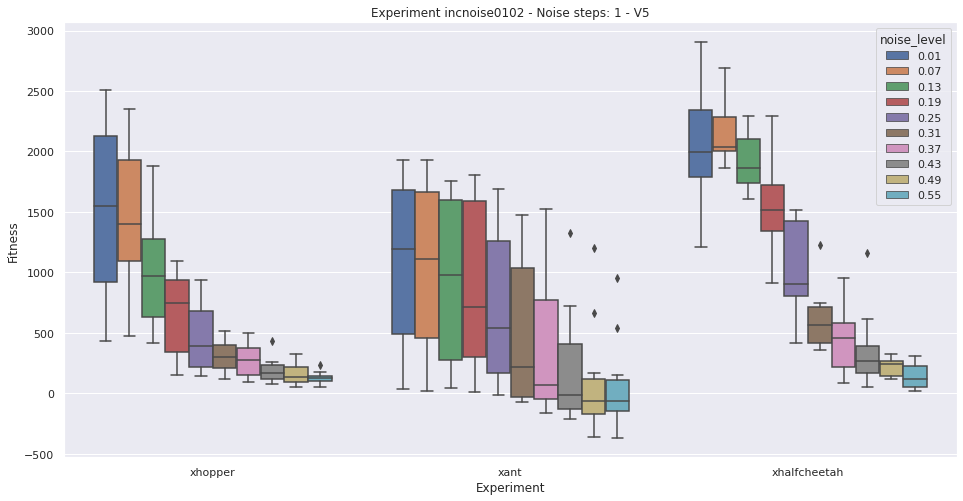

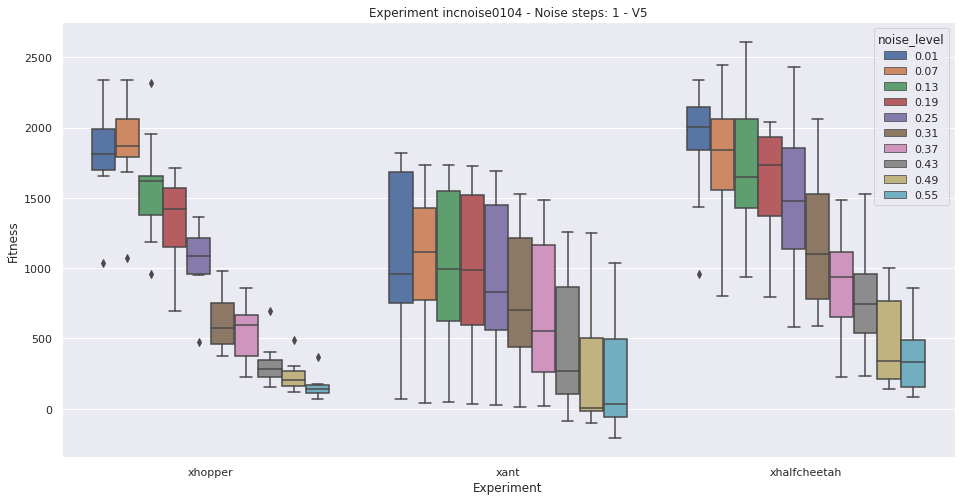

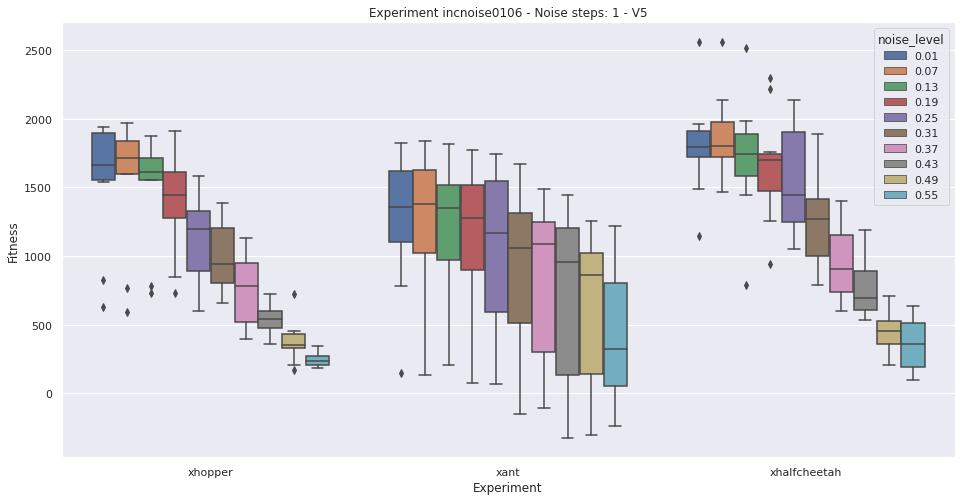

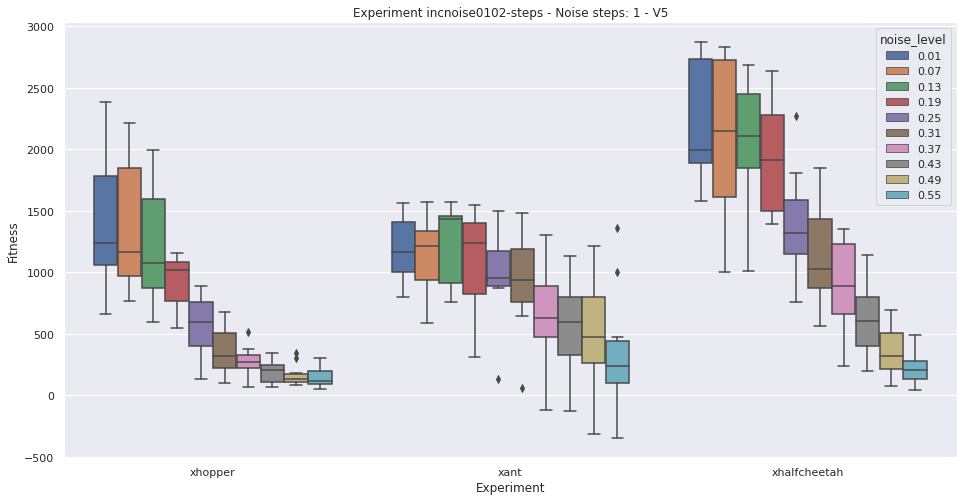

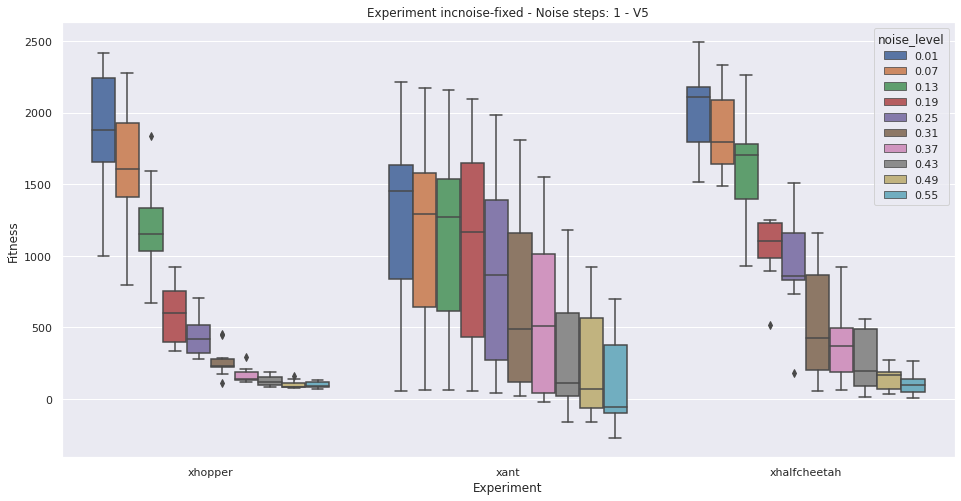

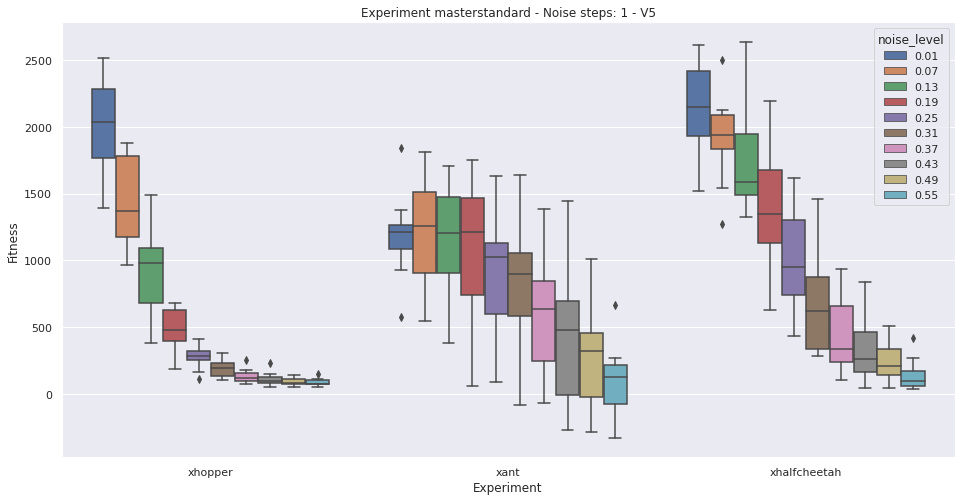

<Figure size 1152x576 with 0 Axes>

In [10]:
for exp in exp_list:
    steps = 1
    ax = sns.boxplot(
        data=data_plot.query(
            f' \
            Experiment == "{exp}" and  \
            Task.isin(@tasks_v5) and  \
            noise_steps == {steps} and  \
            noise_level in (0.01,0.07,0.13,0.19,0.25,0.31,0.37,0.43,0.49,0.55)'
        ,engine="python"),
        x='Task',
        y='Reward',
        hue='noise_level')
    _ = ax.set(xlabel='Experiment',
           ylabel='Fitness',
           title=f'Experiment {exp} - Noise steps: {steps} - V5')
    plt.figure()

## Experiment vs Noise Steps 

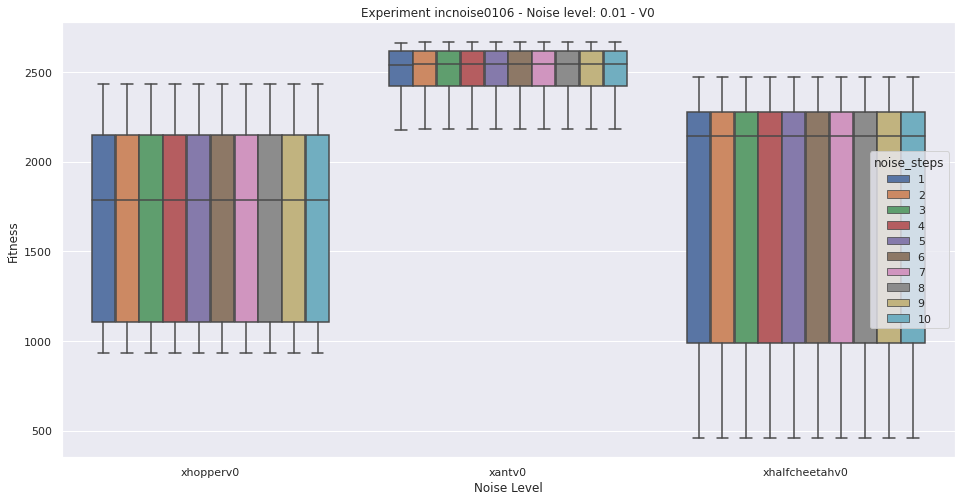

In [11]:
exp = E0106
noise_level = 0.01
ax = sns.boxplot(
    data=data_plot.query(
        f' \
        Experiment == "{exp}" and  \
        Task.isin(@tasks_v0) and  \
        noise_level == {noise_level} and  \
        noise_steps in (1,2,3,4,5,6,7,8,9,10)'
    ,engine="python"),
    x='Task',
    y='Reward',
    hue='noise_steps')
_ = ax.set(xlabel='Noise Level',
       ylabel='Fitness',
       title=f'Experiment {exp} - Noise level: {noise_level} - V0')

## Task vs NoiseSteps

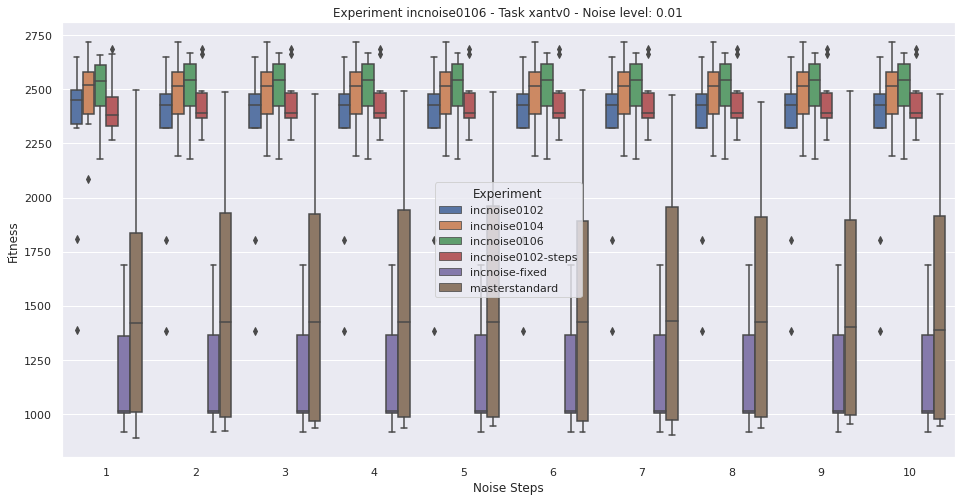

In [12]:
exp = E0106
task = TANT
noise_level = 0.01
ax = sns.boxplot(
    data=data_plot.query(
        f' \
        Experiment.isin(@exp_list) and  \
        (Task == "{task}") and  \
        noise_level == {noise_level} and  \
        noise_steps in (1,2,3,4,5,6,7,8,9,10)'
    ,engine="python"),
    x='noise_steps',
    y='Reward',
    hue='Experiment')
_ = ax.set(xlabel='Noise Steps',
       ylabel='Fitness',
       title=f'Experiment {exp} - Task {task} - Noise level: {noise_level}')